<a href="https://colab.research.google.com/github/nrj130613/myproject/blob/main/predictive_keyboard_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown 1RF697A7FCVvdbYtXGrmzupq04FluQh_f

Downloading...
From: https://drive.google.com/uc?id=1RF697A7FCVvdbYtXGrmzupq04FluQh_f
To: /content/train.src.tok
100% 704M/704M [00:02<00:00, 275MB/s]


In [ ]:
!gdown 17upH5GLwuKJ3sZEzW0Zzdz63bkKw_V8Y

Downloading...
From: https://drive.google.com/uc?id=17upH5GLwuKJ3sZEzW0Zzdz63bkKw_V8Y
To: /content/dev_set.csv
100% 14.0M/14.0M [00:00<00:00, 121MB/s] 


In [ ]:
import pandas as pd
data_dev_set = pd.read_csv('dev_set.csv')

data_dev_set

,context,first letter,answer
0,south korea and the united states on monday wa...,d,day
1,after agreeing to drastically cut its car impo...,t,the
2,three soldiers were injured in a bombing ambus...,m,morning
3,an aviation official says a yemeni investigati...,w,was
4,the movement for democracy in liberia - lrb - ...,t,to
...,...,...,...
94820,steady rates make it easier to predict when [U...,"""",""""
94821,television shows in which homemade robots batt...,h,have
94822,china has enacted an updated bankruptcy law th...,f,for
94823,arthur andersen ' s defense team friday seemed...,a,a


In [ ]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
with open('train.src.tok', 'r') as f:
    training_data = f.read().split('\n')

In [ ]:
sentences = training_data[0:500000]


In [ ]:
context_list = data_dev_set['context'][0:400].tolist()

len(context_list)

400

In [ ]:
first_letter = data_dev_set['first letter'][0:400].tolist()

len(first_letter)

400

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Input, TextVectorization, TimeDistributed
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
# Load a text corpus

split_point = len(sentences) * 4 // 5

In [ ]:
train_set = sentences[:split_point]
dev_set = sentences[split_point:]

In [ ]:
vocab_size = 68000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
train_set = tokenizer.texts_to_sequences(train_set)
dev_set = tokenizer.texts_to_sequences(dev_set)

In [ ]:
len(tokenizer.word_index)

67735

In [ ]:
max_len = 35  # Sequence length to pad the outputs to.
train_set = pad_sequences(sequences=train_set, maxlen=max_len, padding='pre', truncating='pre')
dev_set = pad_sequences(sequences=dev_set, maxlen=max_len, padding='pre', truncating='pre')


In [ ]:
dev_set

array([[   0,    0,    0, ...,    5,  140,  817],
       [   0,    0,    0, ..., 2559,   50, 1339],
       [   0,    0,    0, ...,  211,    5,  528],
       ...,
       [   0,    0,    0, ...,  190,  160,  716],
       [   0,    0,    0, ...,   60,    8,   45],
       [   0,    0,    0, ...,  302,  452,   45]], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
def create_model(max_len, vocab_size, embedding_dim, hidden_dim):
  model = Sequential()
  # Create the layer.
  model.add(Input(shape=(max_len-1,), dtype='int32'))
  model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
  model.add(GRU(hidden_dim, return_sequences=True))
  model.add(TimeDistributed(Dense(vocab_size, activation="softmax")))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
  model.summary()
  return model

model = create_model(max_len, vocab_size, 200, 256)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 200)           13600000  
                                                                 
 gru (GRU)                   (None, 34, 256)           351744    
                                                                 
 time_distributed (TimeDistr  (None, 34, 68000)        17476000  
 ibuted)                                                         
                                                                 
Total params: 31,427,744
Trainable params: 31,427,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    train_set[:,:-1],
    train_set[:,1:,None],
    batch_size=128,
    epochs=2,
    validation_data=(dev_set[:,:-1], dev_set[:,1:,None])
)

Epoch 1/2
3125/3125 [==============================] - 1339s 426ms/step - loss: 6.0134 - val_loss: 4.6793
Epoch 2/2
3125/3125 [==============================] - 1311s 420ms/step - loss: 4.2914 - val_loss: 4.1984


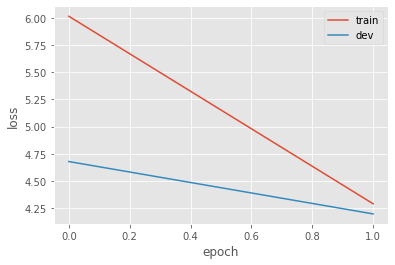

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.style.use('ggplot')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'dev'], loc='best')
  plt.show()
plot_history(history)

In [ ]:
train_set[0]

array([    0,     0,   189,    10,    11,   789,  2674,   988, 15021,
          19,     3,   314,    14,    13,   120,    70,    37,    14,
          13,   120,    24,    38,     5,     2,   695,   305,   232,
           6,  2750,  5302,    58,   590,   419,    23,   420],
      dtype=int32)

In [ ]:
prompt = "south korea and the united states on monday warned north korea to avoid provoking trouble as pyongyang ' s most senior defector spent his sixth"  # B B C trigram exist a lot. The only environment that C occurs
prompt_idx = tokenizer.texts_to_sequences([prompt])
prompt_idx = pad_sequences(sequences=prompt_idx, maxlen=max_len-1)
model.predict(prompt_idx)[0][-1]

1/1 [==============================] - 1s 1s/step


array([4.4152664e-09, 4.3450732e-09, 6.7979636e-05, ..., 4.9644919e-09,
       4.5703126e-09, 4.2694843e-09], dtype=float32)

In [ ]:
prompt_idx

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2]],
      dtype=int32)

**ใช้ได้**

In [ ]:
import random
from numpy.random import choice

def generate(row, tokenizer, predictor_model, end_token=None):
    prompt = row['context']
    first_letter = row['first letter']
    predicted_answer = []
    possible_words = []
    for i in range(max_len-1):
      prompt_idx = tokenizer.texts_to_sequences([prompt])
      prompt_idx = pad_sequences(sequences=prompt_idx, maxlen=max_len-1)
      probs = predictor_model.predict(prompt_idx)[0][-1]
      sorted_indices = [i for i, _ in sorted(enumerate(probs), key=lambda x: x[1], reverse=True)]
      for j in range(len(sorted_indices)):
        index = sorted_indices[j]
        if index in tokenizer.index_word:
            poss_word = tokenizer.index_word[index]
            possible_words.append(poss_word)

    for k in range(len(possible_words)):
      if possible_words[k][0] == first_letter:
        predicted_answer.append(possible_words[k])


        return possible_word

In [ ]:
generate(context_list, tokenizer, model, first_letter)

In [ ]:
generate("after agreeing to drastically cut its car import duties , taiwan on thursday won european union support for its bid to enter", tokenizer, model, 't')

1/1 [==============================] - 0s 23ms/step


'the'

In [ ]:
data_test = data_dev_set[0:400]

In [ ]:
def generate(row, end_token=None):
    prompt = row['context']
    first_letter = row['first letter']
    predicted_answer = []
    possible_words = []
    for i in range(max_len-1):
      prompt_idx = tokenizer.texts_to_sequences([prompt])
      prompt_idx = pad_sequences(sequences=prompt_idx, maxlen=max_len-1)
      probs = model.predict(prompt_idx)[0][-1]
      sorted_indices = [i for i, _ in sorted(enumerate(probs), key=lambda x: x[1], reverse=True)]
      for j in range(len(sorted_indices)):
        index = sorted_indices[j]
        if index in tokenizer.index_word:
            poss_word = tokenizer.index_word[index]
            possible_words.append(poss_word)

    for k in range(len(possible_words)):
      if possible_words[k][0] == first_letter:
        return possible_words[k]

data_test['predicted answer'] = data_test.apply(generate, axis=1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 47ms/step


<ipython-input-24-e99b015ab188>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['predicted answer'] = data_test.apply(generate, axis=1)


In [ ]:
data_test

,context,first letter,answer,predicted answer
0,south korea and the united states on monday wa...,d,day,day
1,after agreeing to drastically cut its car impo...,t,the,the
2,three soldiers were injured in a bombing ambus...,m,morning,morning
3,an aviation official says a yemeni investigati...,w,was,was
4,the movement for democracy in liberia - lrb - ...,t,to,to
...,...,...,...,...
495,french champions lyon said tuesday they have o...,l,lesley,luis
496,iraq on monday officially asked the untied nat...,s,s,s
497,engineers probing the trash truck accident tha...,p,possibly,police
498,mexican stocks closed lower in slow trading fr...,a,a,a


In [ ]:
answer_list = data_test['answer'].tolist()


predict_list = data_test['predicted answer'].tolist()

Compute acc

In [ ]:
def accuracy(true_labels, predicted_labels):
    """
    Computes the accuracy of predicted labels given the true labels.

    Args:
        true_labels (list): A list of true labels.
        predicted_labels (list): A list of predicted labels.

    Returns:
        float: The accuracy of predicted labels, as a percentage.
    """
    correct_count = 0
    for i in range(len(true_labels)):
        if true_labels[i] == predicted_labels[i]:
            correct_count += 1
    acc = correct_count / len(true_labels) * 100
    return acc

In [ ]:
acc = accuracy(answer_list, predict_list)
print(f"Accuracy: {acc:.2f}%")

Accuracy: 48.00%
